<a href="https://colab.research.google.com/github/GunavathiC/ML_Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/green transportation system.csv')
data.head()

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
0,17.490802,106.046123,46.499916,2.095361,27.934722
1,29.014286,99.936814,19.225600,1.648231,15.689067
2,24.639879,76.423087,27.331985,2.911246,17.581553
3,21.973170,141.090001,43.164032,1.047446,20.840268
4,13.120373,121.493624,34.104467,1.969641,22.219200


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
scaled_data = pd.DataFrame(data_scaled, columns=data.columns)
print(scaled_data.head())

   energy_efficiency  co2_emissions  electric_vehicle_penetration  \
0          -0.415900      -0.452465                      0.801884   
1           1.587377      -0.593258                     -1.100359   
2           0.826917      -1.135149                     -0.534981   
3           0.363328       0.355146                      0.569224   
4          -1.175669      -0.096466                     -0.062635   

   cost_efficiency  public_transport_usage  
0         0.482494               -0.684316  
1        -0.136414               -1.389866  
2         1.611824               -1.280827  
3        -0.968007               -1.093072  
4         0.308475               -1.013623  


In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)
print("Explained varience ratio for each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative explained varience ratio:")
print(np.cumsum(pca.explained_variance_ratio_))


Explained varience ratio for each principal component:
[0.20669281 0.20317681 0.2012694  0.19634014 0.19252083]

Cumulative explained varience ratio:
[0.20669281 0.40986962 0.61113902 0.80747917 1.        ]


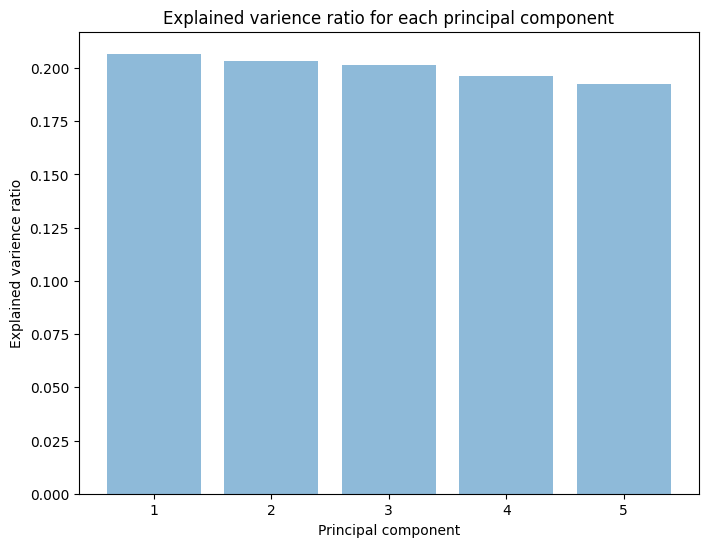

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained varience')
plt.title("Explained varience ratio for each principal component")
plt.xlabel("Principal component")
plt.ylabel("Explained varience ratio")
plt.show()

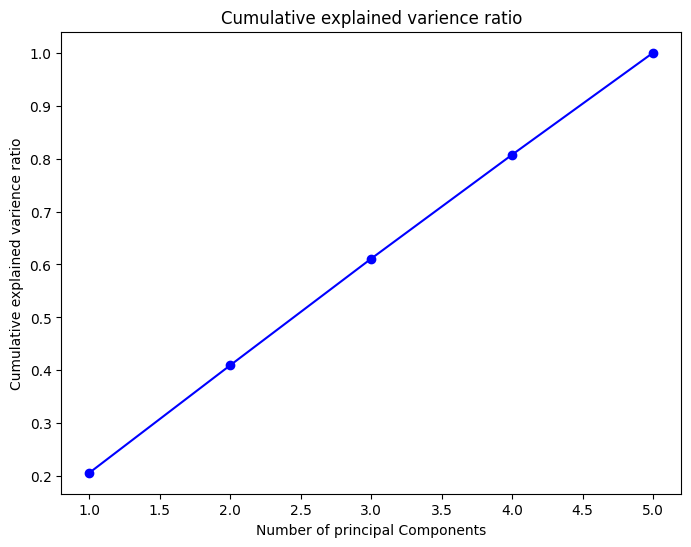

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='-', color='b')
plt.title("Cumulative explained varience ratio")
plt.xlabel("Number of principal Components")
plt.ylabel("Cumulative explained varience ratio")
plt.show()

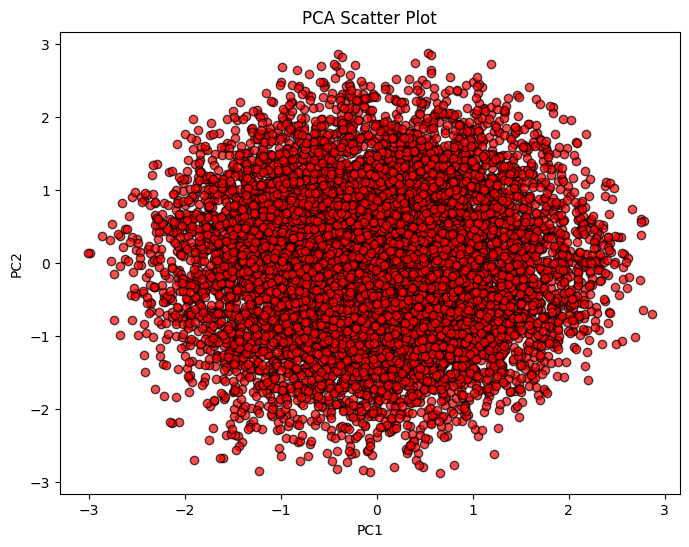

In [9]:
data_pca = pca.transform(data_scaled)
pca_df = pd.DataFrame(data_pca[:, :2], columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='red', edgecolors='k', alpha=0.7)
plt.title("PCA Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()